<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/Deep_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip installing the datasets library
!pip install datasets

In [ ]:
#importing the necessary libraries
from random import shuffle
from datasets import load_dataset
from PIL import Image
import numpy as np

In [ ]:
#loading in the cifar10 dataset from the datasets library
ds = load_dataset("cifar10")

Reusing dataset cifar10 (/root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
#selecting only the image part of both the train and test split
train = ds["train"]["img"]
test = ds["test"]["img"]


In [ ]:
#converting the train images into numpy arrays
training_data = []
testing_data = []

for i in range(len(train)):
  im2arr = np.array(train[i]) # im2arr.shape: height x width x channel
  training_data.append(im2arr)

#converting the test images into numpy array
for i in range(len(test)):
  im2arr = np.array(test[i])
  testing_data.append(im2arr)

In [ ]:
upside_down_training = []
upside_down_testing = []

#rotating the first 25000 images and leaving the rest as normal
import cv2
for i in training_data[:25000]:
  img = cv2.rotate(i,cv2.ROTATE_180)
  upside_down_training.append(img)

normal_training = training_data[25000:]
print(len(normal_training))

#doing the same for the test data
for i in testing_data[:5000]:
  img = cv2.rotate(i,cv2.ROTATE_180)
  upside_down_testing.append(img)

normal_testing = testing_data[5000:]
print(len(normal_testing))

25000
5000


In [ ]:
#creating the labels for both the training data and testing data: 0 for upside down and 1 for normal
training = []
for i,j in zip(upside_down_training, normal_training):
  training.append([i,0])
  training.append([j,1])

testing = []
for k, m in zip(upside_down_testing, normal_testing):
  testing.append([k,0])
  testing.append([m,1])

In [ ]:
#shuffling the training dataset so that the model will not cram the pattern

shuffle(training)
shuffle(testing)

In [ ]:
#splitting the data into x_train, x_test, y_train, y_test
x_train=[]
y_train = []

for i,j in training:
  x_train.append(i)
  y_train.append(j)

x_test = []
y_test = []
for i,j in testing:
  x_test.append(i)
  y_test.append(j)

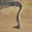

In [ ]:
arr2im = Image.fromarray(x_test[310])
arr2im

In [ ]:
y_test[300]

0

In [ ]:
#for CNN , we need t0 reshape the data 

In [ ]:
#to check the dataset of the first image 

In [ ]:
#rescaling to shape of zero to 1 scale
x_train = np.array(x_train)
x_test= np.array(x_test)
y_train = np.array(y_train)
y_test= np.array(y_test)
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0]

array([[[0.27058824, 0.39607843, 0.60784314],
        [0.2627451 , 0.38431373, 0.59607843],
        [0.26666667, 0.38823529, 0.59215686],
        ...,
        [0.19215686, 0.31372549, 0.50196078],
        [0.21176471, 0.32156863, 0.50196078],
        [0.21568627, 0.31764706, 0.50196078]],

       [[0.3254902 , 0.44313725, 0.63921569],
        [0.31372549, 0.43137255, 0.62745098],
        [0.32156863, 0.43529412, 0.62352941],
        ...,
        [0.23137255, 0.3372549 , 0.5254902 ],
        [0.23529412, 0.32941176, 0.50980392],
        [0.21176471, 0.30588235, 0.4745098 ]],

       [[0.37254902, 0.48235294, 0.6627451 ],
        [0.36862745, 0.47058824, 0.65490196],
        [0.37254902, 0.4745098 , 0.65098039],
        ...,
        [0.26666667, 0.35686275, 0.53333333],
        [0.25098039, 0.32941176, 0.50196078],
        [0.23137255, 0.31372549, 0.47058824]],

       ...,

       [[0.22352941, 0.31764706, 0.47843137],
        [0.21960784, 0.30980392, 0.48235294],
        [0.22352941, 0

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train = x_train.reshape (len(x_train), 32,32,3)
x_test = x_test.reshape (len(x_test), 32,32,3)



In [ ]:
#CREATE CNN MODEL 
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers

In [ ]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, activation="relu", kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters =64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters =64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")]) 

In [ ]:
#compiling the model
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#training our model
cnn.fit(x_train, y_train, epochs=15,validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 14s 9ms/step - loss: 0.5681 - accuracy: 0.6859 - val_loss: 0.5031 - val_accuracy: 0.7420
Epoch 2/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.4871 - accuracy: 0.7551 - val_loss: 0.4520 - val_accuracy: 0.7740
Epoch 3/15
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4479 - accuracy: 0.7800 - val_loss: 0.4304 - val_accuracy: 0.7884
Epoch 4/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.4181 - accuracy: 0.7984 - val_loss: 0.4207 - val_accuracy: 0.7966
Epoch 5/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3954 - accuracy: 0.8112 - val_loss: 0.4314 - val_accuracy: 0.7908
Epoch 6/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3724 - accuracy: 0.8261 - val_loss: 0.4186 - val_accuracy: 0.8008
Epoch 7/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3540 - accuracy: 0.8383 - val_loss: 0.4132 - val_ac

In [ ]:
#Our predicted values
y_pred = cnn.predict(x_test)
y_pred =[0 if i < 0.5 else 1 for i in y_pred[10:20]]
y_pred

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

In [ ]:
#Real values
y_test[10:20]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image_dataset_from_directory
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [ ]:
#using pre trained model
model = VGG16(include_top=False, input_shape=(32,32,3), weights="imagenet") 
for layer in model.layers:
    layer.trainable = False
x = Flatten()(model.output)
dense1 = Dense(1024, activation="relu")(x)
prediction = Dense(1, activation="sigmoid")(dense1)
model = Model(inputs=model.inputs, outputs=prediction)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = "binary_crossentropy",
    metrics  = ['accuracy']
    )


In [ ]:
model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 32s 22ms/step - loss: 0.5763 - accuracy: 0.6850 - val_loss: 0.5471 - val_accuracy: 0.7110
Epoch 2/20
1407/1407 [==============================] - 30s 22ms/step - loss: 0.5228 - accuracy: 0.7272 - val_loss: 0.5243 - val_accuracy: 0.7226
Epoch 3/20
1407/1407 [==============================] - 30s 21ms/step - loss: 0.4944 - accuracy: 0.7436 - val_loss: 0.5192 - val_accuracy: 0.7280
Epoch 4/20
1407/1407 [==============================] - 30s 21ms/step - loss: 0.4713 - accuracy: 0.7619 - val_loss: 0.4938 - val_accuracy: 0.7462
Epoch 5/20
1407/1407 [==============================] - 30s 22ms/step - loss: 0.4504 - accuracy: 0.7767 - val_loss: 0.4909 - val_accuracy: 0.7460
Epoch 6/20
1407/1407 [==============================] - 31s 22ms/step - loss: 0.4320 - accuracy: 0.7895 - val_loss: 0.5066 - val_accuracy: 0.7434
Epoch 7/20
1407/1407 [==============================] - 31s 22ms/step - loss: 0.4156 - accuracy: 0.7971 - val_loss: 0.4923 -

In [ ]:
#making predictions
predictions = model.predict(x_test)

In [ ]:
#our predicted values
y_preds = [0 if i < 0.5 else 1 for i in predictions[20:30]]
y_preds

[1, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [ ]:
#real values
y_train[20:30]

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])